In [14]:
import pandas as pd
contracts = pd.read_csv (r'/Users/firne/bip-python-unh/sales_analysis/data/contracts.csv')
customers = pd.read_csv (r'/Users/firne/bip-python-unh/sales_analysis/data/customers.csv')
customers['id'] = customers['id'].astype(str)
contracts['customer_id'] = contracts['customer_id'].astype(str)
customers = customers.rename(columns={'id': 'customer_id'})
customers.set_index('customer_id', inplace=True)
contracts.set_index('customer_id', inplace=True)
df = contracts.join(customers, how='inner')
df['deposit'] = df['deposit'].replace('[$,()]', '', regex=True)
df['deposit'] = df['deposit'].astype(float)

,contract_id,contract_start,contract_term,deposit,monthly_amt,company,sector,industry,email,address,city,state,zip
customer_id,,,,,,,,,,,,,
1,41,5/31/2019,24,86000.0,"$11,200.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,358,6/18/2019,13,74000.0,"$19,000.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,400,8/11/2019,19,38000.0,"$8,800.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,424,3/13/2019,15,77000.0,"$14,300.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,438,10/16/2019,22,39000.0,"$20,000.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170


In [1]:
import pandas as pd
customers = pd.read_csv (r'C:\Users\firne\bip-python-unh\sales_analysis\data\customers.csv')
contracts = pd.read_csv (r'C:\Users\firne\bip-python-unh\sales_analysis\data\contracts.csv')
customers.rename(columns={'id':'customer_id'}, inplace=True)
customers.set_index('customer_id', inplace=True)
contracts.set_index('customer_id', inplace=True)
sales_data = contracts.join(customers, how='left')
sales_data["deposit"] = sales_data["deposit"].replace('[\$\,\.]',"",regex=True).astype(int)
sales_data["monthly_amt"] = sales_data["monthly_amt"].replace('[\$\,\.]',"",regex=True).astype(int)
sales_data['contract_term'] = sales_data['contract_term'].astype(int)
sales_data['deposit'] = pd.to_numeric(sales_data.deposit)
sales_data.head()

,contract_id,contract_start,contract_term,deposit,monthly_amt,company,sector,industry,email,address,city,state,zip
customer_id,,,,,,,,,,,,,
1,41,5/31/2019,24,8600000,1120000,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,358,6/18/2019,13,7400000,1900000,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,400,8/11/2019,19,3800000,880000,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,424,3/13/2019,15,7700000,1430000,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,438,10/16/2019,22,3900000,2000000,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170


In [3]:
#finding count of sales by state
sales_data.groupby(['state'])
monthly = sales_data['contract_term']*sales_data['monthly_amt']
sales_data['total_sales'] = monthly
number_sales = sales_data.groupby(['state']).agg('count')
number_sales.sort_values(['total_sales'], ascending=True, inplace=True)
number_sales['total_sales'].tail(5)

state
NY     43
WA     54
FL     70
CA     88
TX    104
Name: total_sales, dtype: int64

In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'total_sales')

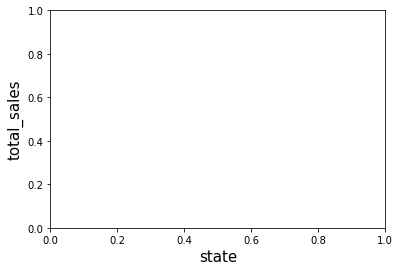

In [11]:
x = sales_data['state']
y = sales_data.groupby(['state']).agg('count')
plt.xlabel('state', fontsize = 15)
plt.ylabel('total_sales', fontsize = 15)

<AxesSubplot:xlabel='state'>

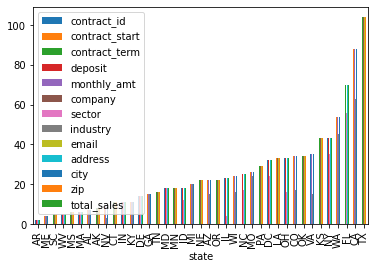

In [7]:
number_sales.plot(kind="bar")